In [131]:
import pickle
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')

In [138]:
with open('data/data.pkl', 'rb') as f:
    loaded_data_chi8 = pickle.load(f)


with open('data/data_2.pkl', 'rb') as f:
    loaded_data_chi16 = pickle.load(f)
    
lambda_values = loaded_data_chi8['lambdas']

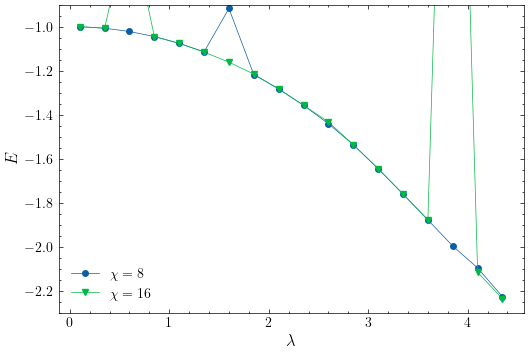

In [139]:
plt.figure(figsize=(6, 4))
plt.plot(lambda_values, loaded_data_chi8["energies"], 'o-', markersize=4, linewidth=0.5, label=r'$\chi = 8$')
plt.plot(lambda_values, loaded_data_chi16["energies"], 'v-', markersize=4, linewidth=0.5, label=r'$\chi = 16$')
plt.legend()
plt.ylim(-2.3, -0.9)
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r'$E$', fontsize=12)
plt.show()

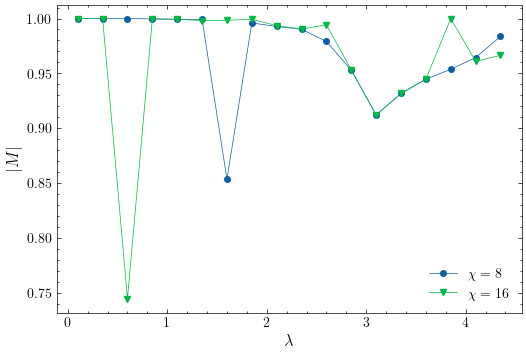

In [140]:
plt.figure(figsize=(6, 4))
plt.plot(lambda_values, loaded_data_chi8['Mg'], 'o-', markersize=4, linewidth=0.5, label=r'$\chi = 8$')
plt.plot(lambda_values, loaded_data_chi16['Mg'], 'v-', markersize=4, linewidth=0.5, label=r'$\chi = 16$')
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r'$M$', fontsize=12)
plt.legend()
plt.show()

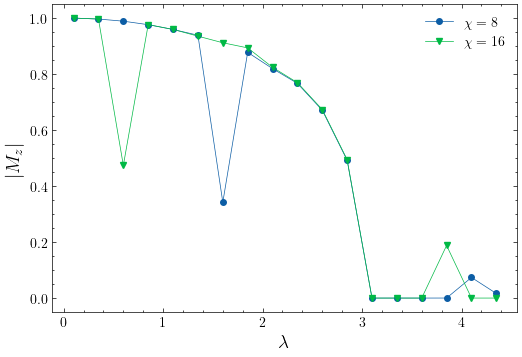

In [142]:
plt.figure(figsize=(6, 4))
plt.plot(lambda_values, abs(np.array(loaded_data_chi8["Mz"])), 'o-', markersize=4, linewidth=0.5, label=r'$\chi = 8$')
plt.plot(lambda_values, abs(np.array(loaded_data_chi16["Mz"])), 'v-', markersize=4, linewidth=0.5, label=r'$\chi = 16$')
plt.legend()
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r'$|M_z|$', fontsize=14)
plt.show()
